#**Supervised Learning Model Comparison**

##**Life Expectancy (WHO) Analysis**

The WHO Life Expectancy dataset provides global statistics on life expectancy at birth and
various ages, categorized by gender and health indicators. This analysis will involve
comparing both regression and classification models. For regression, we will predict exact
life expectancy values based on various features, while for classification, we will categorize
countries as "developed" or "developing" based on the status column. We will evaluate
model performance using metrics such as R² for regression and F1 score for classification.
This dual approach will enhance our understanding of the factors influencing life expectancy
and inform targeted public health strategies.

***Dataset Link:***

https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv

**Model Comparison Steps:-**

**1. Initial Exploration and Pre-Processing**

**1.1.** Load the dataset and perform an initial exploration to understand its structure and
content.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv')
df.head() # First 5 rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.tail() # Last 5 rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [4]:
df.shape # Rows and Columns

(2938, 22)

In [5]:
df.info() # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe() # Summary statistics

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**1.2.** Determine the number of unique values in the ***'Country'*** and ***'Year'*** columns.

In [7]:
a = ['Country', 'Year']
df[a].nunique()

,0
Country,193
Year,16


**1.3.** Analyze the distribution of values in the ***'Status'*** column. If the dataset is
imbalanced, consider using appropriate metrics for evaluation.

In [8]:
# Count of each class in 'Status' column
status_counts = df['Status'].value_counts()
print("Class Counts:\n", status_counts)

# Proportion of each class in 'Status' column
status_proportions = status_counts / len(df)
print("\nClass Proportions:\n", status_proportions)

Class Counts:
 Status
Developing    2426
Developed      512
Name: count, dtype: int64

Class Proportions:
 Status
Developing    0.825732
Developed     0.174268
Name: count, dtype: float64


### **Explanation**

- **Class Counts**: `df['Status'].value_counts()` shows the count of each category in the `Status` column. This output helps identify any imbalance between classes.

- **Class Proportions**: `status_counts / len(df)` calculates the proportion of each category by dividing the counts by the total number of rows in the dataset. This proportion indicates the degree of imbalance, showing the relative distribution of each class.

#### **Output:**
- **"Developing"** represents about **82.57%** of the dataset.
- **"Developed"** represents about **17.43%** of the dataset.

This significant difference shows an **imbalance** in class distribution, which suggests using metrics like **F1 score** to evaluate model performance on this data.

**1.4.** Check for any missing values. Impute missing values for all numerical columns
using the median or another suitable strategy.

In [9]:
# Check for missing values
print("Missing Values Before Imputation:")
print(df.isnull().sum())

# Impute missing values for numerical columns using the median
numerical_cols = df.select_dtypes(include=['number']).columns  # Select only numerical columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())  # Fill missing values with the column's median

# Verify if missing values are imputed
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Missing Values Before Imputation:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Missing Values After Imputation:
Country                            0
Year                    

In [10]:
# Function to remove leading/trailing spaces from column names
def remove_spaces(df):
    new_cols = []
    for col in df.columns:
        new_col = col.strip()  # Remove leading/trailing spaces
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Apply the function to the DataFrame
df = remove_spaces(df)

**1.5.** Optionally, you may perform a comprehensive EDA to visualize relationships,
distributions, and patterns in the data.

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

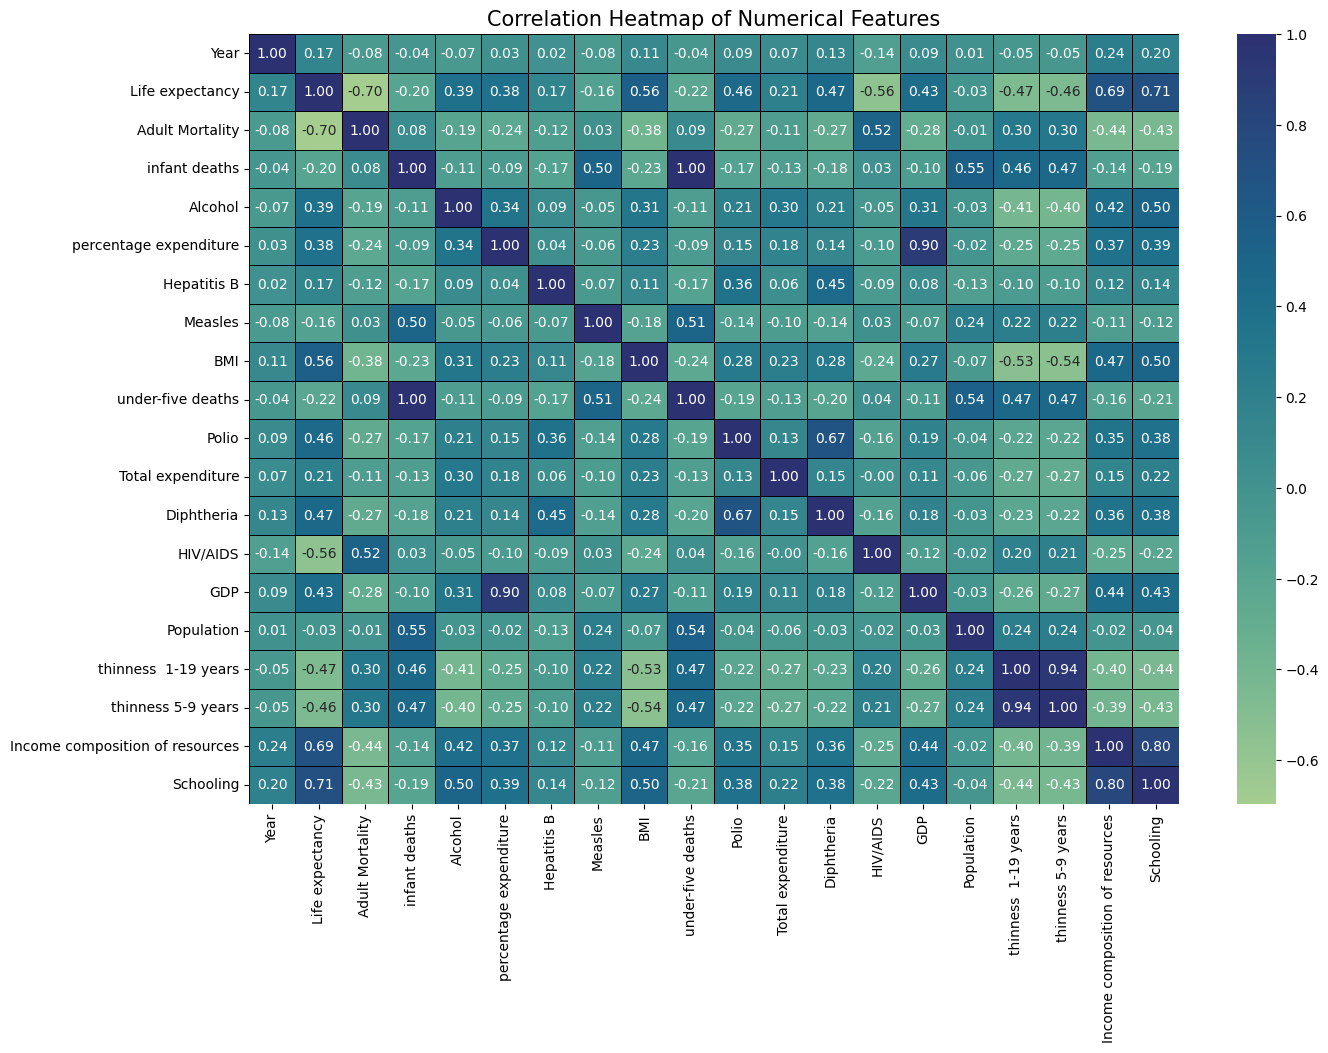

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Generate the heatmap using the correlation matrix of numerical features
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='crest', linewidths=0.5, linecolor='black')

plt.title('Correlation Heatmap of Numerical Features', fontsize=15)

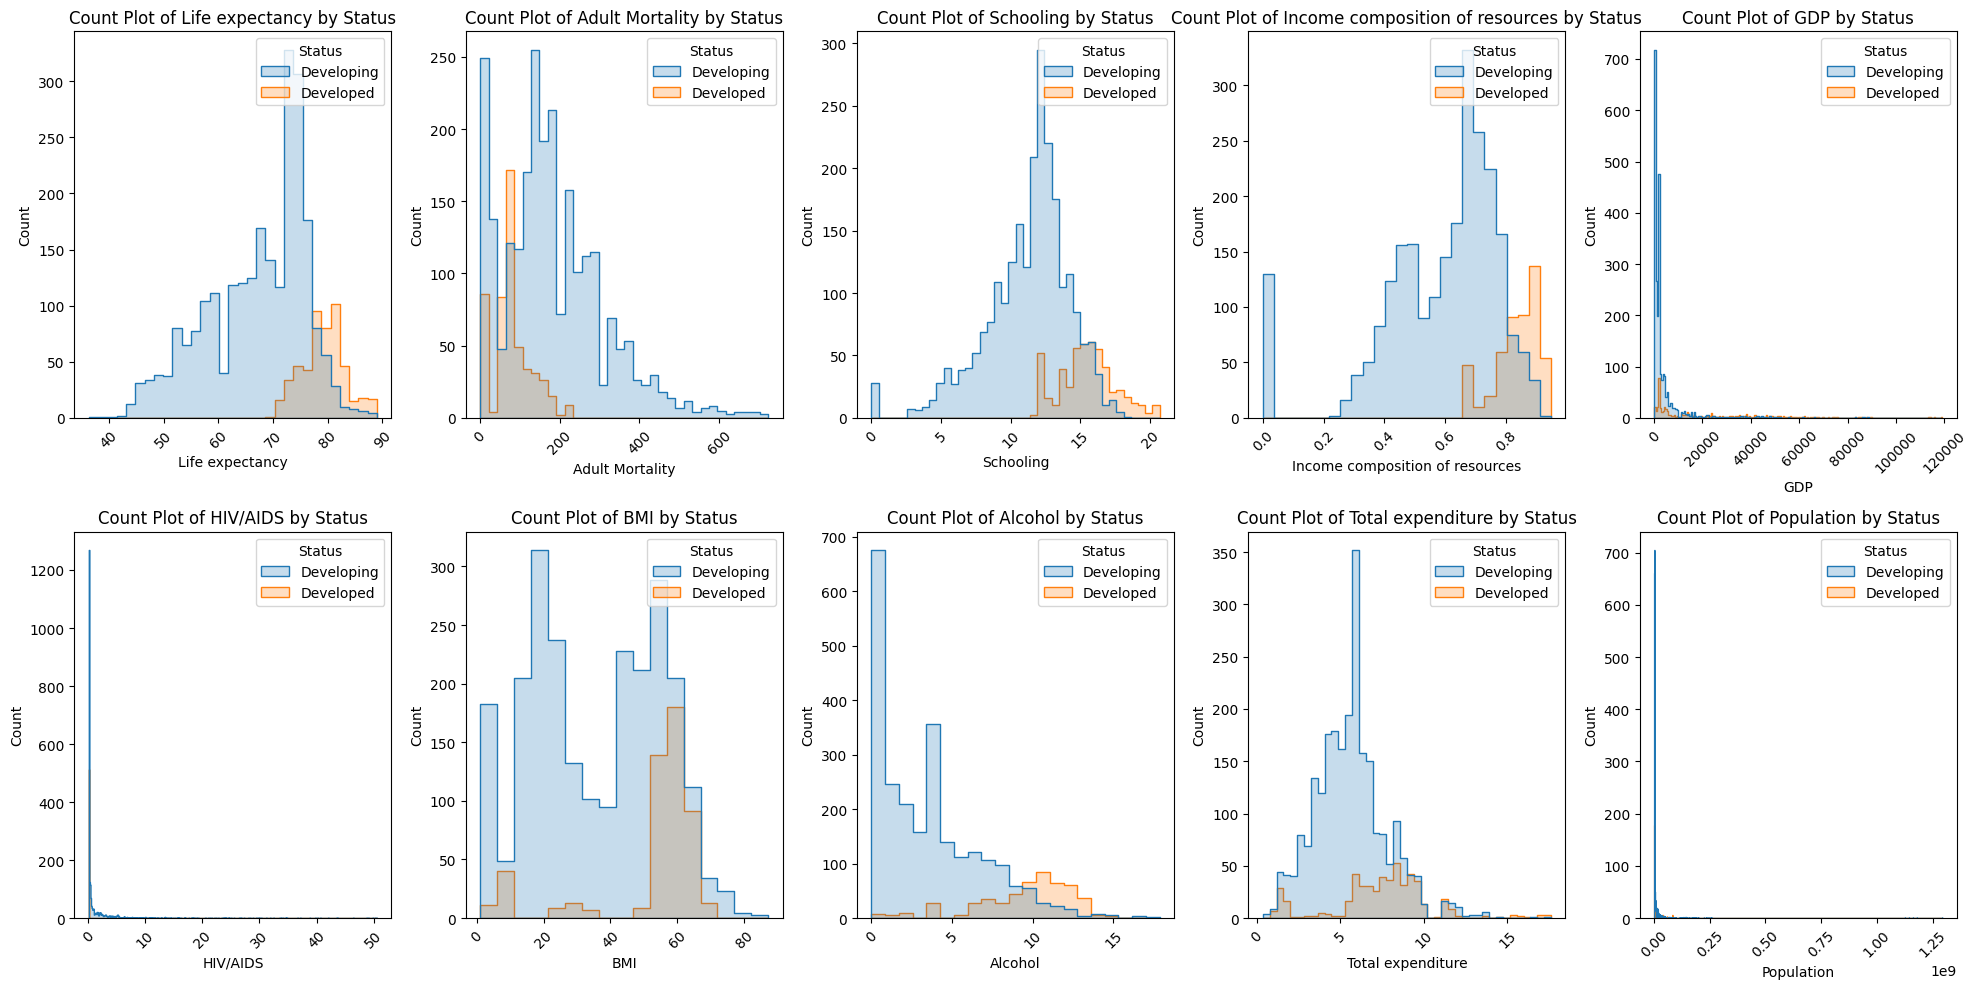

In [12]:
# Define important features and target
important_features = ['Life expectancy', 'Adult Mortality', 'Schooling',
                      'Income composition of resources', 'GDP', 'HIV/AIDS',
                      'BMI', 'Alcohol', 'Total expenditure', 'Population']
target = 'Status'

# Set up the matplotlib figure with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

# Plot each important feature as a count plot
for i, feature in enumerate(important_features):
    sns.histplot(data=df, x=feature, hue=target, element='step', ax=axes[i], kde=False)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Count Plot of {feature} by {target}')

# Adjust layout
plt.tight_layout()
plt.show()

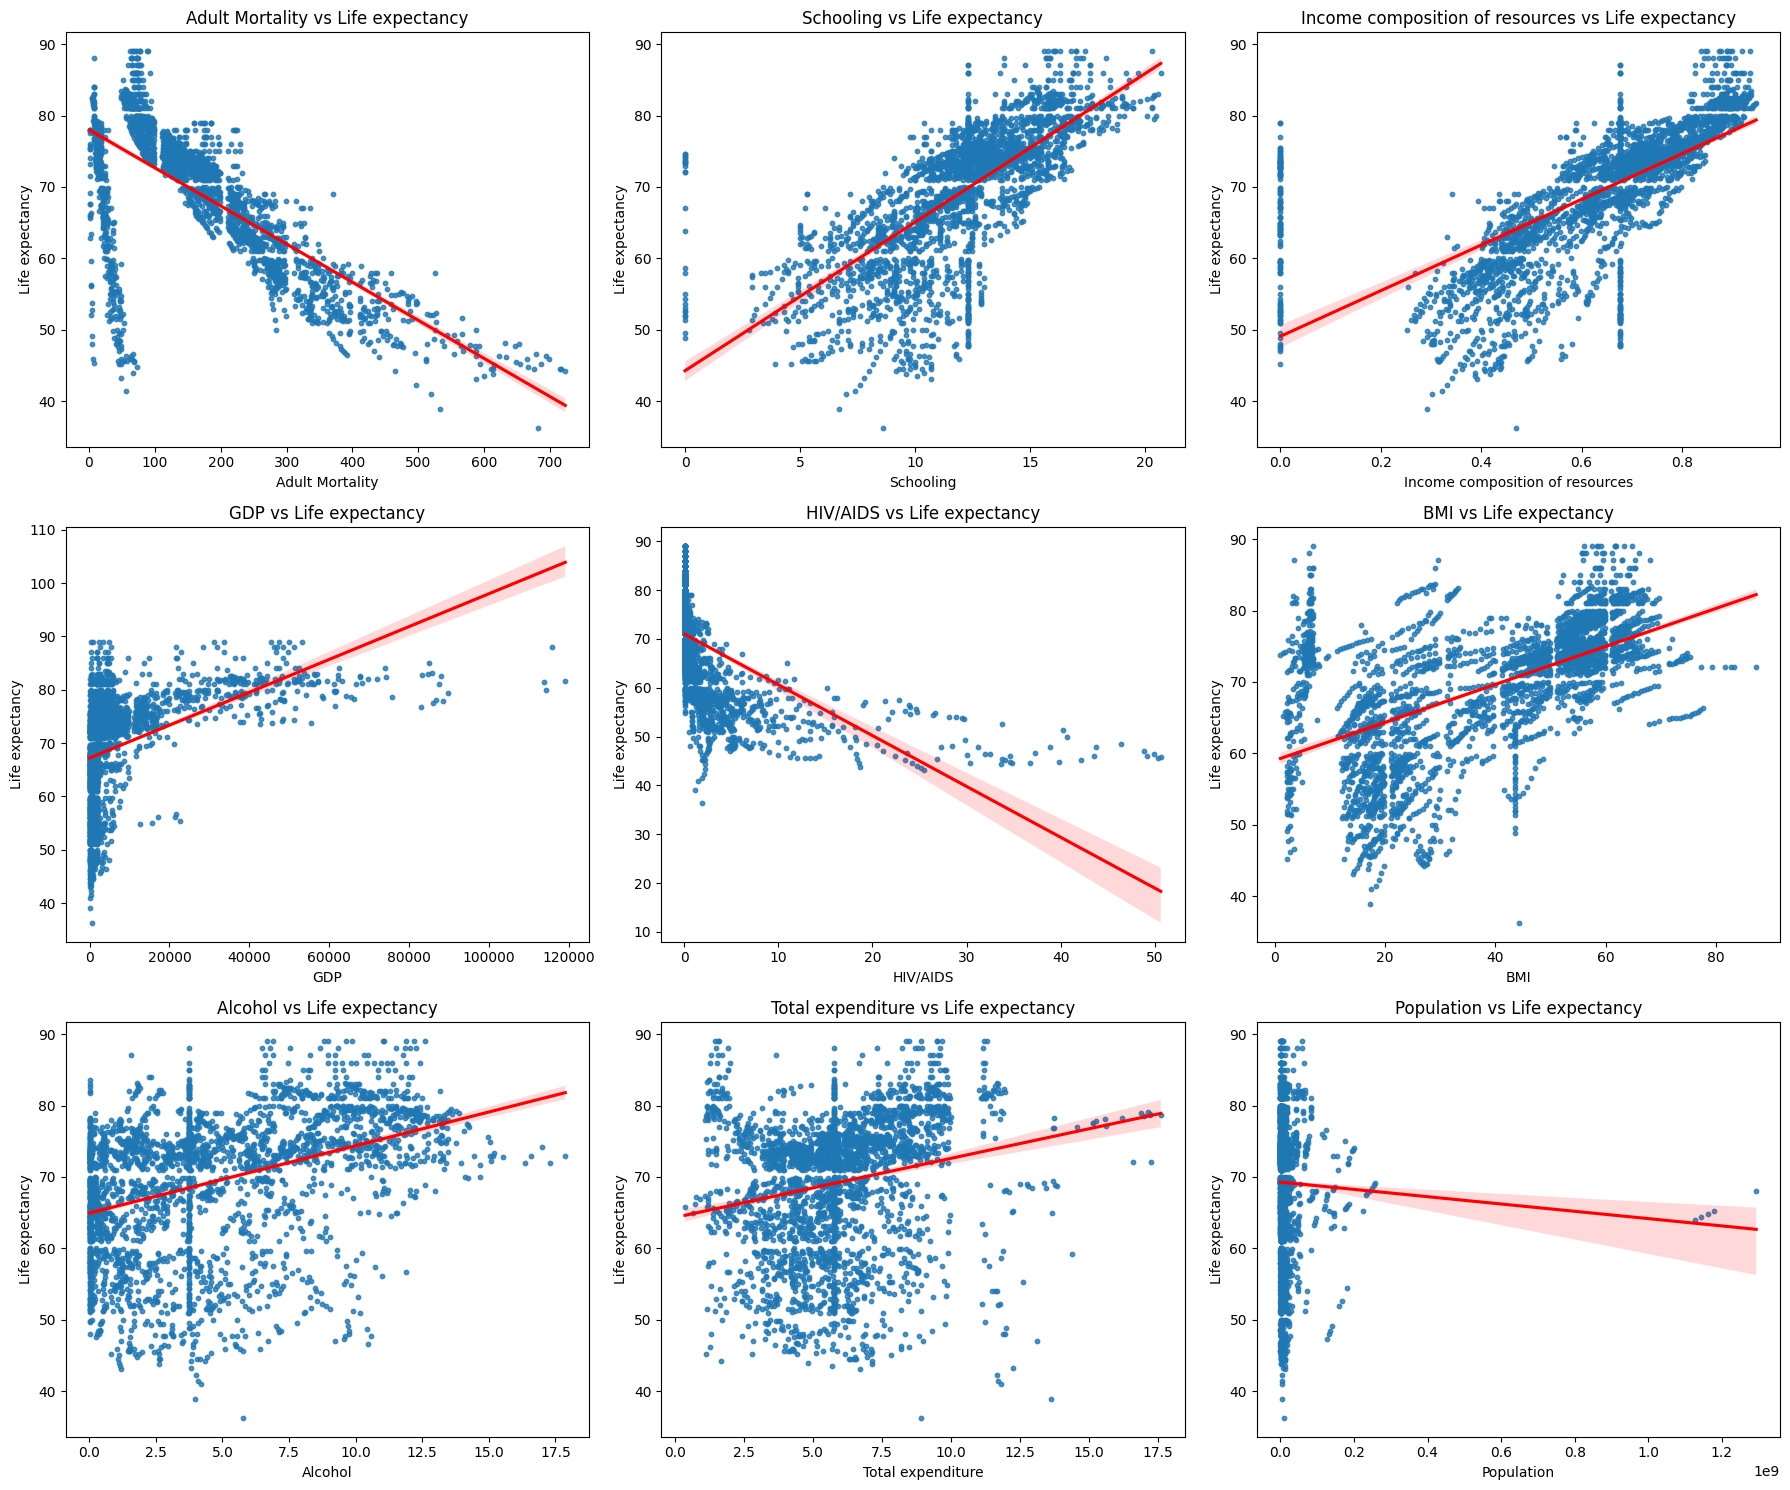

In [13]:
# Define important features and target
important_features = ['Adult Mortality', 'Schooling',
                      'Income composition of resources', 'GDP', 'HIV/AIDS',
                      'BMI', 'Alcohol', 'Total expenditure', 'Population']
target = 'Life expectancy'

# Set up the matplotlib figure with a grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# Plot each important feature as a scatter plot with a trend line
for i, feature in enumerate(important_features):
    sns.regplot(data=df, x=feature, y=target, ax=axes[i], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    axes[i].set_title(f'{feature} vs {target}')

# Remove any unused subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

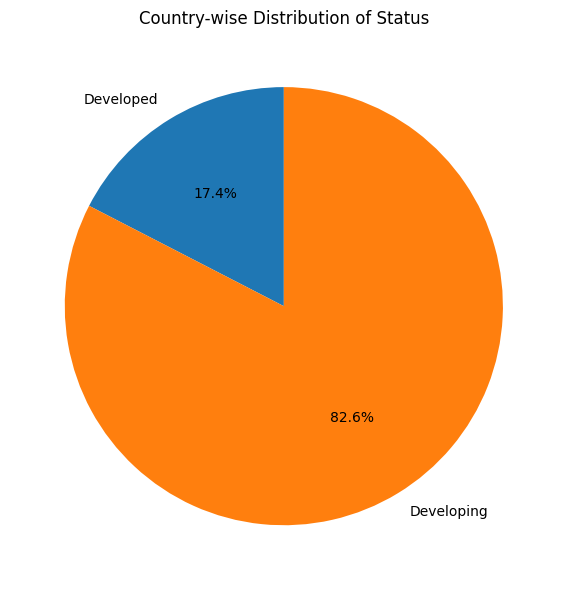

In [14]:
# Group data by Country and Status, then count occurrences
country_status_counts = df.groupby(['Country', 'Status']).size().reset_index(name='Count')

# Create the Pie chart
plt.figure(figsize=(10, 6))
country_status_counts.groupby('Status')['Count'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Country-wise Distribution of Status')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

<ipython-input-15-2520538e9ba5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Status', y='Life expectancy', palette='Set2')


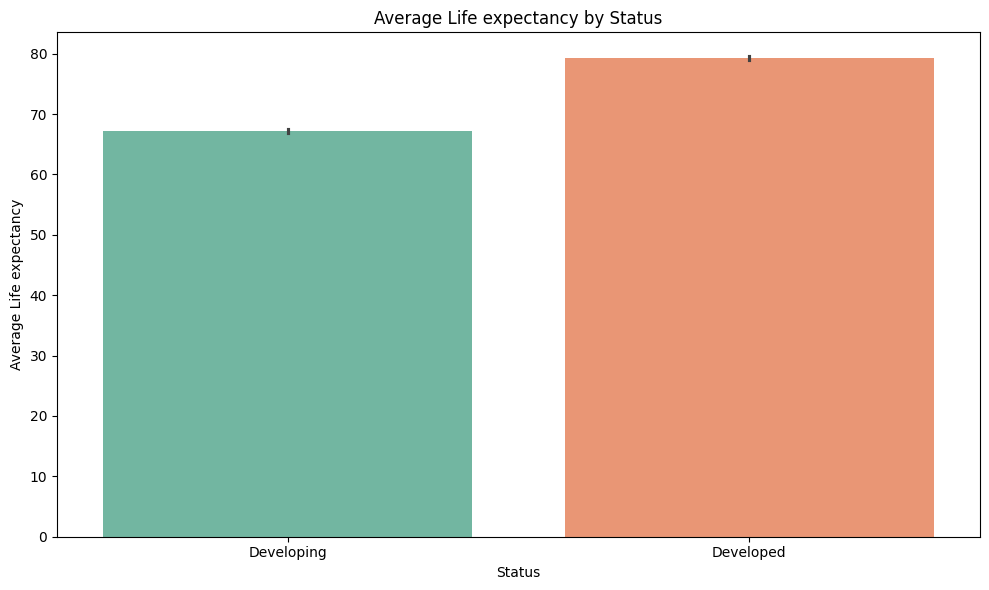

In [15]:
# Create a Bar Chart to show the average Life expectancy for each Status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Status', y='Life expectancy', palette='Set2')

# Set the title and labels
plt.title('Average Life expectancy by Status')
plt.ylabel('Average Life expectancy')
plt.xlabel('Status')

# Show the plot
plt.tight_layout()
plt.show()

**1.6.** Encode categorical columns appropriately

In [16]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Encode the 'Status' column using Label Encoding
df['Status'] = le.fit_transform(df['Status'])

# Display the unique values in the 'Status' column after encoding
print(f"The unique values in the Status column after encoding: {df['Status'].unique()}")

# Display the mapping of original labels to encoded values
print(f"\nMapping of the 'Status' column: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Display the first few rows of the DataFrame after encoding
print("\nDataFrame after encoding the 'Status' column:")
df.head()

The unique values in the Status column after encoding: [1 0]

Mapping of the 'Status' column: {'Developed': 0, 'Developing': 1}

DataFrame after encoding the 'Status' column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


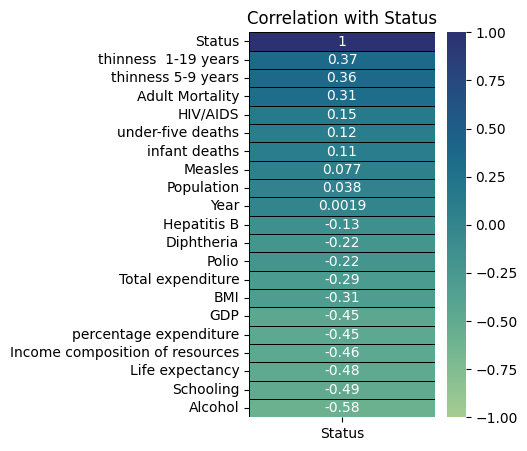

In [17]:
plt.figure(figsize=(3, 5))

# Calculate correlation only for numerical columns with 'Status'
numerical_df = df.select_dtypes(include=['number'])
correlation_with_status = numerical_df.corr()[['Status']].sort_values(by='Status', ascending=False)

# Now create the heatmap
sns.heatmap(correlation_with_status, annot=True, cmap='crest', linewidths=0.5, linecolor='black', vmin=-1, vmax=1)
plt.title('Correlation with Status')
plt.show()

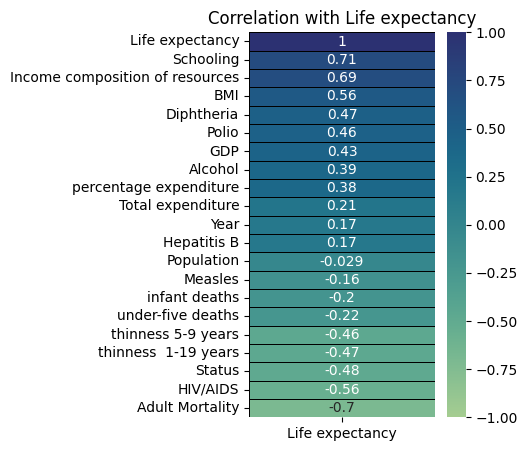

In [18]:
plt.figure(figsize=(3, 5))

# Calculate correlation only for numerical columns with 'Status'
numerical_df = df.select_dtypes(include=['number'])
correlation_with_Life_expectancy = numerical_df.corr()[['Life expectancy']].sort_values(by='Life expectancy', ascending=False)

# Now create the heatmap
sns.heatmap(correlation_with_Life_expectancy, annot=True, cmap='crest', linewidths=0.5, linecolor='black', vmin=-1, vmax=1)
plt.title('Correlation with Life expectancy')
plt.show()

**2. Classification Models Comparison**

**2.1.** Define ***'Status'*** as the target variable and use all other columns as features.

In [19]:
# Define features (X) and target (y)
X = df.drop('Status', axis=1)
y = df['Status']

**2.2.** Split the data into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2.3.** Scale all feature columns, excluding ***'Country'*** and ***'Year'***.


In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data (excluding 'Country' and 'Year')
numerical_cols = X_train.select_dtypes(include=['number']).columns
# Remove 'Country' and 'Year' from the list of numerical columns if they exist
numerical_cols = numerical_cols.drop(['Country', 'Year'], errors='ignore')
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the testing data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

**2.4.** Compare classification models including ***Logistic Regression***, ***K-Neighbors***
***Classifier*** , ***Decision Tree Classifier***, ***Random Forest Classifier***, ***Support Vector***
***Classifier***, ***Gaussian Naive Bayes***, and ***XGBoost***. Report both ***accuracy*** and
***F1-scores*** for each model. Optionally, you may perform hyperparameter tuning to
optimize model performance.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings

warnings.filterwarnings("ignore")

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Define the parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'K-Neighbors Classifier': {'n_neighbors': [3, 5, 7]},
    'Decision Tree Classifier': {'max_depth': [None, 10, 20]},
    'Random Forest Classifier': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'Support Vector Classifier': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Perform hyperparameter tuning and evaluate the models
results = []
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='f1', cv=3, n_jobs=-1, verbose=1)
        # Drop 'Country' and 'Year' before fitting the model
        grid_search.fit(X_train.drop(['Country', 'Year'], axis=1), y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_  # Capture best parameters
    else:
        best_model = model
        best_model.fit(X_train.drop(['Country', 'Year'], axis=1), y_train)
        best_params = 'N/A'  # No hyperparameter tuning for models without parameter grids

    y_pred = best_model.predict(X_test.drop(['Country', 'Year'], axis=1))
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-score': f1,
        'Best Parameters': best_params  # Add best parameters to the results
    })

# Print the results
cls_results_df = pd.DataFrame(results)
cls_results_df

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


,Model,Accuracy,F1-score,Best Parameters
0,Logistic Regression,0.931973,0.958848,{'C': 1}
1,K-Neighbors Classifier,0.955782,0.973306,{'n_neighbors': 3}
2,Decision Tree Classifier,0.962585,0.977320,{'max_depth': 10}
3,Random Forest Classifier,0.982993,0.989817,"{'max_depth': None, 'n_estimators': 200}"
4,Support Vector Classifier,0.957483,0.974253,"{'C': 10, 'kernel': 'rbf'}"
5,Gaussian Naive Bayes,0.777211,0.847497,N/A
6,XGBoost,0.984694,0.990807,"{'learning_rate': 0.1, 'n_estimators': 200}"


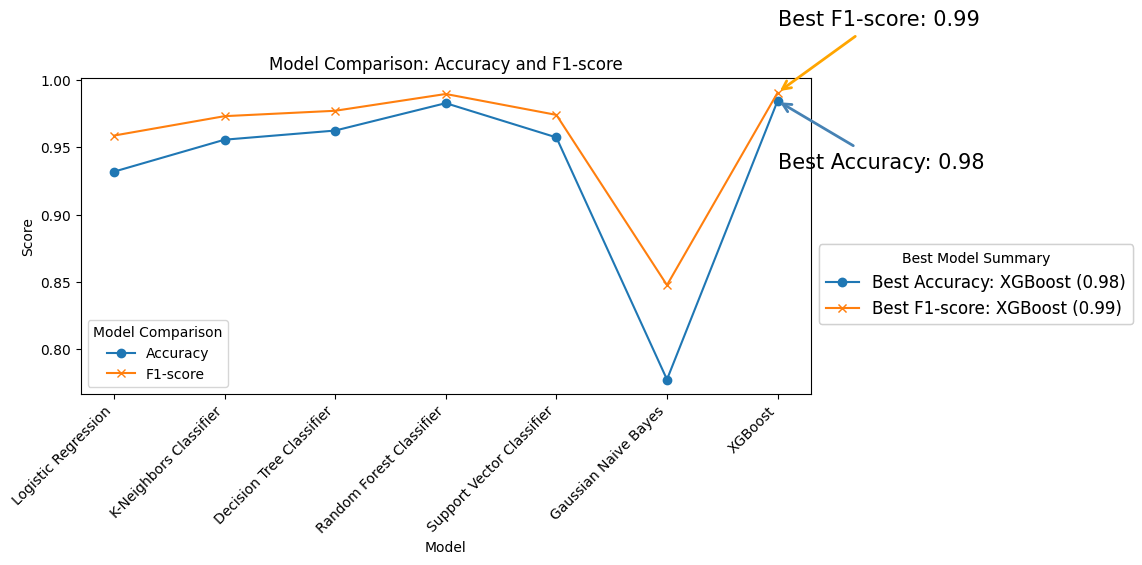

In [23]:
# Assuming 'cls_results_df' is the DataFrame from the previous code
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(cls_results_df['Model'], cls_results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(cls_results_df['Model'], cls_results_df['F1-score'], marker='x', label='F1-score')

# Find the best accuracy and best F1-score
best_accuracy_model = cls_results_df.loc[cls_results_df['Accuracy'].idxmax()]
best_f1_score_model = cls_results_df.loc[cls_results_df['F1-score'].idxmax()]

# Best accuracy annotation (move it up)
plt.annotate(f'Best Accuracy: {best_accuracy_model["Accuracy"]:.2f}',
             xy=(best_accuracy_model.name, best_accuracy_model['Accuracy']),
             xytext=(best_accuracy_model.name, best_accuracy_model['Accuracy'] - 0.05),  # Move annotation higher
             arrowprops=dict(facecolor='steelblue', edgecolor='steelblue', arrowstyle="->", shrinkA=5, lw=2),  # Steelblue arrow
             color='black', fontsize=15)  # Set fontsize for annotation

# Best F1-score annotation (move it down)
plt.annotate(f'Best F1-score: {best_f1_score_model["F1-score"]:.2f}',
             xy=(best_f1_score_model.name, best_f1_score_model['F1-score']),
             xytext=(best_f1_score_model.name, best_f1_score_model['F1-score'] + 0.05),  # Move annotation lower
             arrowprops=dict(facecolor='orange', edgecolor='orange', arrowstyle="->", shrinkA=5, lw=2),  # Orange arrow
             color='black', fontsize=15)  # Set fontsize for annotation

# First legend: Model comparison (Accuracy and F1-score)
first_legend = plt.legend(title="Model Comparison", loc='lower left')

# Second legend: Best Model Summary
second_legend = plt.legend(title="Best Model Summary",
                           labels=[f'Best Accuracy: {best_accuracy_model["Model"]} ({best_accuracy_model["Accuracy"]:.2f})',
                                   f'Best F1-score: {best_f1_score_model["Model"]} ({best_f1_score_model["F1-score"]:.2f})'],
                           loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Add both legends to the plot
plt.gca().add_artist(first_legend)
plt.gca().add_artist(second_legend)

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy and F1-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        97
           1       0.99      0.99      0.99       491

    accuracy                           0.98       588
   macro avg       0.97      0.98      0.97       588
weighted avg       0.98      0.98      0.98       588



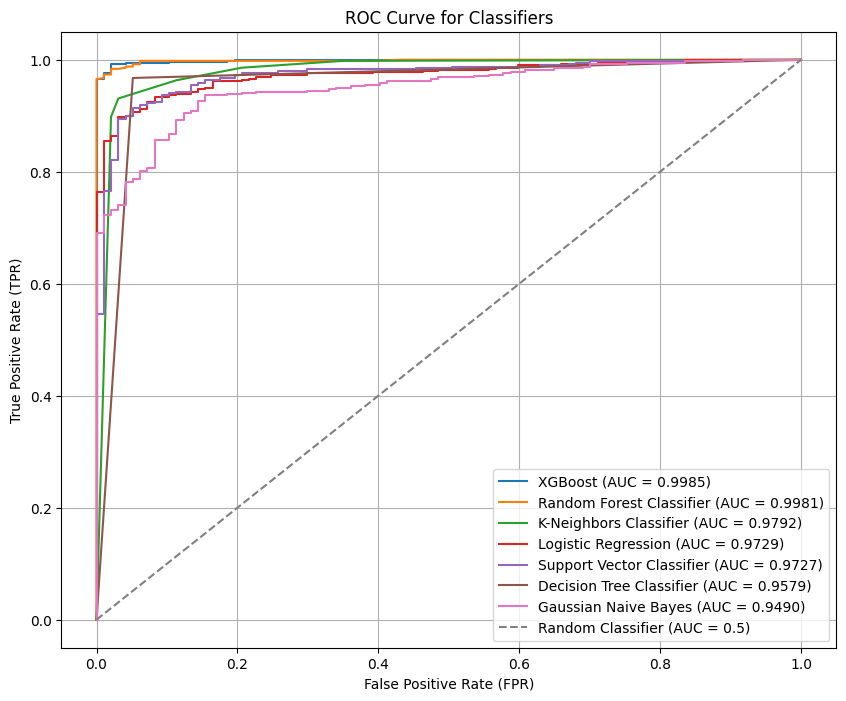

In [25]:
from sklearn.metrics import roc_curve, auc

# Define classifiers (after hyperparameter tuning if required)
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42, probability=True),  # Enable probability estimates for ROC
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Initialize an empty dictionary to store FPR, TPR, and AUC for each model
fpr_tpr_auc = {}

# Fit the models, calculate ROC, and store FPR, TPR, and AUC
for name, model in classifiers.items():
    model.fit(X_train.drop(['Country', 'Year'], axis=1), y_train)  # Fit model
    y_pred_proba = model.predict_proba(X_test.drop(['Country', 'Year'], axis=1))[:, 1]  # Get probabilities for ROC curve (for binary classification)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Store FPR, TPR, and AUC
    fpr_tpr_auc[name] = {'FPR': fpr, 'TPR': tpr, 'AUC': roc_auc}

# Sort models by AUC in descending order
sorted_models = sorted(fpr_tpr_auc.items(), key=lambda x: x[1]['AUC'], reverse=True)

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve in sorted order
for name, values in sorted_models:
    plt.plot(values['FPR'], values['TPR'], label=f'{name} (AUC = {values["AUC"]:.4f})')

# Plot diagonal line (random model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')

# Customize plot
plt.title('ROC Curve for Classifiers')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**2.5.** Identify and report the best-performing classification model for this dataset.

In [26]:
best_f1_score_model = cls_results_df.loc[cls_results_df['F1-score'].idxmax()]
print(f"The best performing classification model is {best_f1_score_model['Model']} with an F1-score of {best_f1_score_model['F1-score']:.2f}")

The best performing classification model is XGBoost with an F1-score of 0.99


### **REPORT: Best-Performing Classification Model Based on F1-Score**

Since this is an imbalanced dataset, we considered the **F1-score** as the key metric for evaluation, as it balances **precision** and **recall**.

- **Best Model**: *XGBoost*
- **F1-Score**: *0.99*

This model performs the best in handling the class imbalance, making it the most reliable choice for this dataset.


**3. Regression Models Comparison**

**3.1.** Define ***'Life expectancy'*** as the target variable and use all other columns as features.

In [27]:
# Define features (X) and target (y) for regression
X_reg = df.drop('Life expectancy', axis=1)
y_reg = df['Life expectancy']

**3.2.** Split the data into training and testing sets.


In [28]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

**3.3.** Scale all feature columns, excluding ***'Country'***, ***'Year'***, and ***'Status'***.


In [29]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data (excluding 'Country', 'Year', and 'Status')
numerical_cols = X_train_reg.select_dtypes(include=['number']).columns
# Remove 'Country', 'Year', and 'Status' from the list of numerical columns if they exist
numerical_cols = numerical_cols.drop(['Country', 'Year', 'Status'], errors='ignore')
X_train_reg[numerical_cols] = scaler.fit_transform(X_train_reg[numerical_cols])

# Transform the testing data using the same scaler
X_test_reg[numerical_cols] = scaler.transform(X_test_reg[numerical_cols])

**3.4.** Compare regression models including ***Linear Regression,*** ***Decision Tree Regressor,***
***Random Forest Regressor,*** ***Support Vector*** ***Regressor,*** ***and K-Neighbors Regressor.***
Report ***R² score*** and ***Mean Absolute Error*** for each model. Optionally, you may
perform hyperparameter tuning to enhance performance.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Decision Tree Regressor': {'max_depth': [None, 10, 20]},
    'Random Forest Regressor': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'Support Vector Regressor': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Neighbors Regressor': {'n_neighbors': [3, 5, 7]}
}

# Perform hyperparameter tuning and evaluate the models
results = []
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=1)
        grid_search.fit(X_train_reg.drop(['Country', 'Year', 'Status'], axis=1, errors='ignore'), y_train_reg)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model
        best_model.fit(X_train_reg.drop(['Country', 'Year', 'Status'], axis=1, errors='ignore'), y_train_reg)
        best_params = 'N/A'  # No hyperparameter tuning for Linear Regression in this case

    y_pred = best_model.predict(X_test_reg.drop(['Country', 'Year', 'Status'], axis=1, errors='ignore'))
    r2 = r2_score(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    results.append({
        'Model': name,
        'R² Score': r2,
        'Mean Absolute Error': mae,
        'Best Parameters': best_params
    })

# Print the results as a DataFrame
reg_results_df = pd.DataFrame(results)
reg_results_df

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits


,Model,R² Score,Mean Absolute Error,Best Parameters
0,Linear Regression,0.822111,2.859304,N/A
1,Decision Tree Regressor,0.919939,1.618365,{'max_depth': 20}
2,Random Forest Regressor,0.967426,1.112932,"{'max_depth': None, 'n_estimators': 200}"
3,Support Vector Regressor,0.935995,1.528095,"{'C': 10, 'kernel': 'rbf'}"
4,K-Neighbors Regressor,0.922470,1.784184,{'n_neighbors': 3}


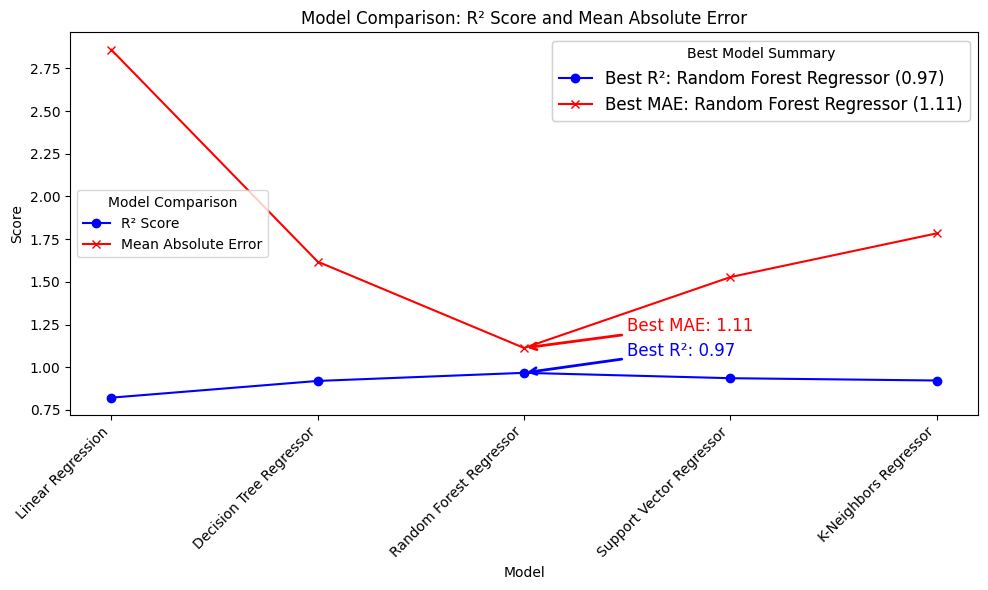

In [31]:
# Assuming 'reg_results_df' is the DataFrame containing the regression results
# Create the line plot
plt.figure(figsize=(10, 6))

# Plot R² Score and Mean Absolute Error
plt.plot(reg_results_df['Model'], reg_results_df['R² Score'], marker='o', label='R² Score', color='b')
plt.plot(reg_results_df['Model'], reg_results_df['Mean Absolute Error'], marker='x', label='Mean Absolute Error', color='r')

# Find the best R² Score and best Mean Absolute Error
best_r2_model = reg_results_df.loc[reg_results_df['R² Score'].idxmax()]
best_mae_model = reg_results_df.loc[reg_results_df['Mean Absolute Error'].idxmin()]

# Best R² Score annotation
plt.annotate(f'Best R²: {best_r2_model["R² Score"]:.2f}',
             xy=(best_r2_model.name, best_r2_model['R² Score']),
             xytext=(best_r2_model.name + 0.5, best_r2_model['R² Score'] + 0.10),  # Adjusted position
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle="->", lw=2),
             color='blue', fontsize=12)

# Best Mean Absolute Error annotation
plt.annotate(f'Best MAE: {best_mae_model["Mean Absolute Error"]:.2f}',
             xy=(best_mae_model.name, best_mae_model['Mean Absolute Error']),
             xytext=(best_mae_model.name + 0.5, best_mae_model['Mean Absolute Error'] + 0.10),  # Adjusted position
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle="->", lw=2),
             color='red', fontsize=12)

# First legend: Model comparison (R² and Mean Absolute Error)
first_legend = plt.legend(title="Model Comparison", loc='center left')

# Second legend: Best Model Summary
second_legend = plt.legend(title="Best Model Summary",
                           labels=[f'Best R²: {best_r2_model["Model"]} ({best_r2_model["R² Score"]:.2f})',
                                   f'Best MAE: {best_mae_model["Model"]} ({best_mae_model["Mean Absolute Error"]:.2f})'],
                           loc='upper right', bbox_to_anchor=(1, 1), fontsize=12)

# Add both legends to the plot
plt.gca().add_artist(first_legend)
plt.gca().add_artist(second_legend)

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: R² Score and Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

**3.5.** Identify and report the best-performing regression model for this dataset.


In [32]:
# Identify the best performing regression model based on the highest R² score
best_r2_model = reg_results_df.loc[reg_results_df['R² Score'].idxmax()]

# Identify the best performing model based on the lowest Mean Absolute Error (MAE)
best_mae_model = reg_results_df.loc[reg_results_df['Mean Absolute Error'].idxmin()]

# Common print statement for the best model based on both R² score and MAE
best_model = best_r2_model if best_r2_model['R² Score'] > best_mae_model['Mean Absolute Error'] else best_mae_model

print(f"The best performing regression model is {best_model['Model']} with an R² score of {best_model['R² Score']:.2f} and Mean Absolute Error of {best_model['Mean Absolute Error']:.4f}")

The best performing regression model is Random Forest Regressor with an R² score of 0.97 and Mean Absolute Error of 1.1129


## **3.5 REPORT: Best-Performing Regression Model**

The table below compares the performance of several regression models using **R² Score** and **Mean Absolute Error (MAE)**. The **Random Forest Regressor** outperforms the other models in both metrics.

### **Model Comparison**

| Model                     | R² Score   | Mean Absolute Error | Best Parameters                              |
|---------------------------|------------|---------------------|----------------------------------------------|
| Linear Regression          | 0.822111   | 2.859304            | N/A                                          |
| Decision Tree Regressor    | 0.919939   | 1.618365            | {'max_depth': 20}                            |
| Random Forest Regressor    | **0.967426** | **1.112932**        | {'max_depth': None, 'n_estimators': 200}     |
| Support Vector Regressor   | 0.935995   | 1.528095            | {'C': 10, 'kernel': 'rbf'}                   |
| K-Neighbors Regressor      | 0.922470   | 1.784184            | {'n_neighbors': 3}                           |

### **Analysis:**
- **Best R² Score**: The **Random Forest Regressor** has the highest R² score of **0.967426**, indicating that it explains the most variance in the data.
- **Lowest Mean Absolute Error (MAE)**: The **Random Forest Regressor** also has the lowest MAE of **1.112932**, indicating the smallest average error between the predicted and actual values.

### **Conclusion:**
The **Random Forest Regressor** is the best-performing regression model for this dataset, as it has both the highest R² score and the lowest mean absolute error. The optimal parameters for this model are `{'max_depth': None, 'n_estimators': 200}`.

Thus, **Random Forest Regressor** is recommended as the best regression model based on the provided evaluation metrics.


#**Unsupervised Learning – k-Means and Hierarchical Clustering**

##**Customer Segmentation**

The mall-customers dataset provides demographic and spending information about customers
at a shopping mall, including features such as age, income, and spending score. This analysis
will utilize k-Means clustering to segment customers into distinct groups based on their
behaviors and characteristics. By identifying these segments, we can uncover patterns and
insights that can inform targeted marketing strategies and improve customer experience. The
results will help in understanding customer preferences and optimizing services to enhance
engagement and satisfaction.

***Dataset Link:***
https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv



In [33]:
usl_df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv')
usl_df.head() # First 5 rows

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
usl_df.tail() # Last 5 rows

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [35]:
# Rename the 'Genre' column to 'Gender'
usl_df = usl_df.rename(columns={'Genre': 'Gender'})
usl_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
usl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**k-Means Clustering Steps:**

**➔ Initial Visualization:** Create a scatter plot using **'Annual Income (k$)'** on the x-axis
and **'Spending Score (1-100)'** on the y-axis to visualize the data distribution.

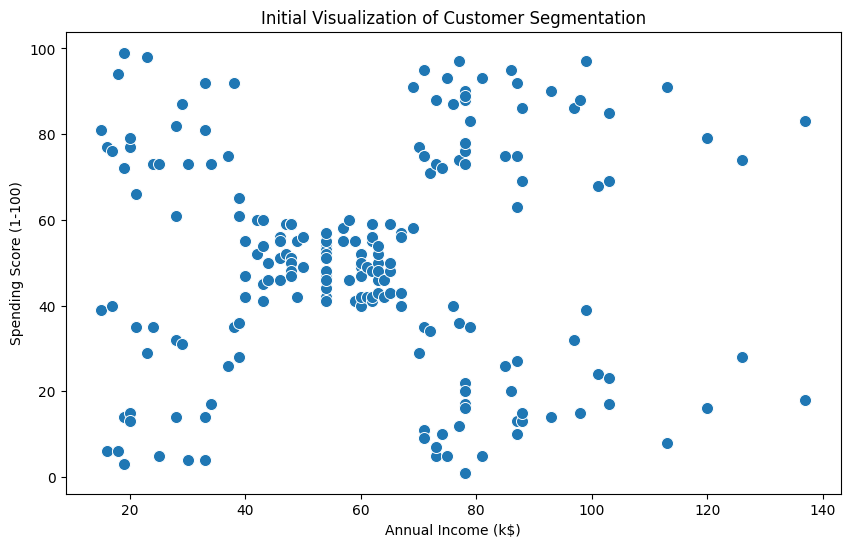

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=usl_df, x='Annual Income (k$)', y='Spending Score (1-100)', s=75)
plt.title('Initial Visualization of Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

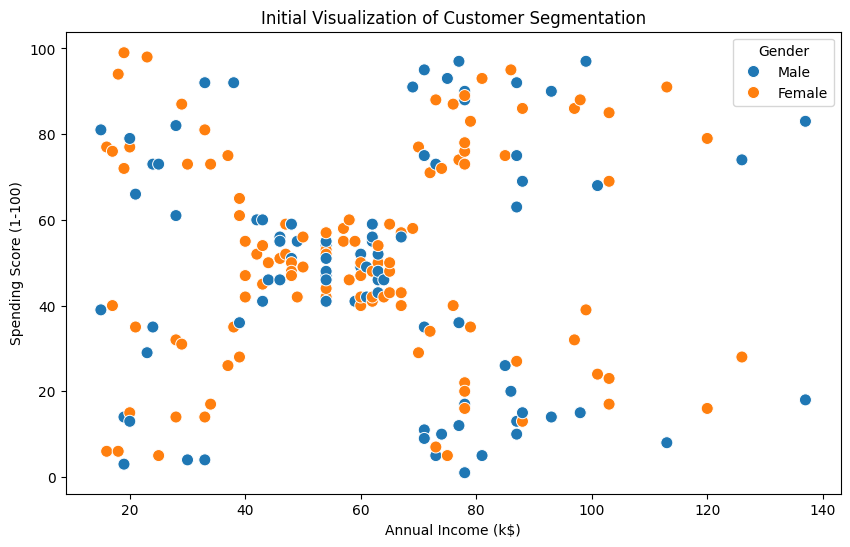

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=usl_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', s=75)
plt.title('Initial Visualization of Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**➔ Feature Selection:** Select ***'Annual Income (k$)'*** and ***'Spending Score (1-100)'*** as the
features for k-Means clustering.


In [39]:
# Feature selection
X_kmeans = usl_df[['Annual Income (k$)', 'Spending Score (1-100)']]

**➔ Determine Optimal k-Value:** Calculate the ***Within-Cluster Sum of Squares (WCSS)***
for a range of k-values.


In [40]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11): # k-values (number of clusters) from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

**➔ Plot the Elbow Chart:** Plot the elbow method graph to visually determine the
optimal k-value.


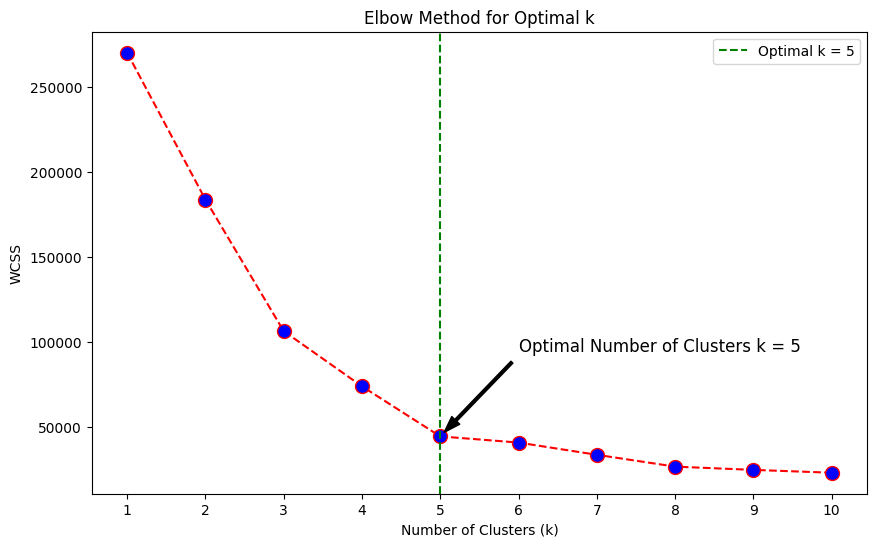

In [41]:
# First, install kneed if you haven't already
!pip install kneed

#In Python is by using the KneeLocator from the kneed library,
#which can automatically detect the elbow point in the WCSS values.

from kneed import KneeLocator

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(range(1, 11))
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Mark the optimal number of clusters
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()

# Annotate the optimal number of clusters
plt.annotate(f'Optimal Number of Clusters k = {optimal_k}',
             xy=(optimal_k, wcss[optimal_k - 1]),
             xytext=(optimal_k + 1, wcss[optimal_k - 1] + 50000),  # Adjust position of text
             arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8),
             fontsize=12, color='black')

# Display the plot
plt.show()

**➔ Build k-Means Model:**

**◆** Construct the k-Means model using the optimal k-value determined in the
previous step.


In [42]:
from sklearn.cluster import KMeans

# Fit K-means
k = optimal_k # Optimal K value is 5 determined in the previous step.
kmeans = KMeans(n_clusters=k, init='k-means++')
usl_df['Clusters'] = kmeans.fit_predict(X_kmeans)
usl_df.head() # First 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


**◆** Identify the clusters and centroids from the model.


In [43]:
usl_df['Clusters'].unique()

array([0, 3, 1, 2, 4], dtype=int32)

In [44]:
usl_df['Clusters'].replace({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5'}, inplace=True)
usl_df['Clusters'].unique()

array(['Cluster 1', 'Cluster 4', 'Cluster 2', 'Cluster 3', 'Cluster 5'],
      dtype=object)

In [45]:
# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

print("Cluster Labels:\n", cluster_labels)
print("\nCentroids:\n", centroids)

Cluster Labels:
 [0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]

Centroids:
 [[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


In [46]:
usl_df.head() # First 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,Cluster 1
1,2,Male,21,15,81,Cluster 4
2,3,Female,20,16,6,Cluster 1
3,4,Female,23,16,77,Cluster 4
4,5,Female,31,17,40,Cluster 1


In [47]:
usl_df.tail() # Last 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
195,196,Female,35,120,79,Cluster 3
196,197,Female,45,126,28,Cluster 5
197,198,Male,32,126,74,Cluster 3
198,199,Male,32,137,18,Cluster 5
199,200,Male,30,137,83,Cluster 3


**➔ Visualization of Clusters:** Plot the scatter plot again, this time including the
centroids. Color the data points according to their respective clusters to visualize the
clustering results effectively.

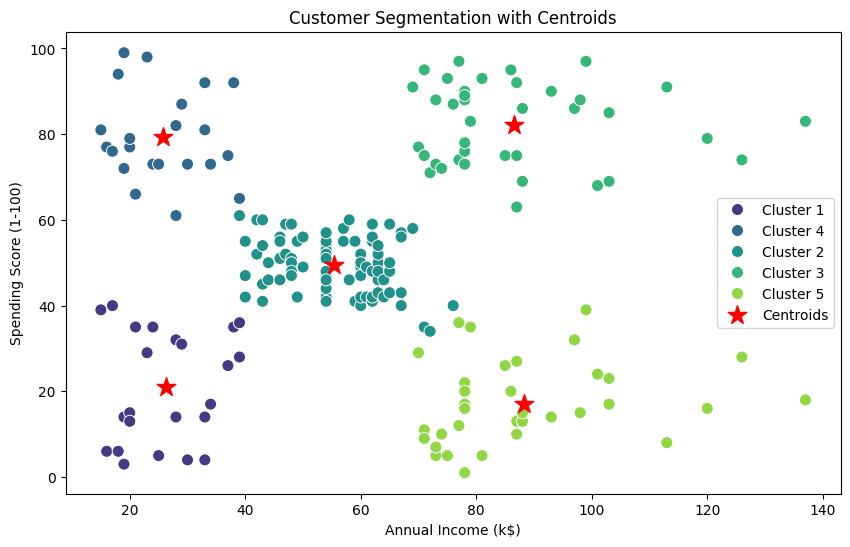

In [48]:
# Plot the clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Clusters', data=usl_df, palette='viridis', s=75)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')

plt.title('Customer Segmentation with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#**Model Identification of Clusters**

## **Overview**
The k-means clustering algorithm has been applied to the customer segmentation data with optimal clusters identified. The clustering is based on two key variables:
- **Annual Income (k$)**
- **Spending Score (1-100)**

The goal is to group customers into distinct clusters based on their income and spending habits, which can help in targeting different customer segments.

## **Clustering Analysis**

### **Optimal Number of Clusters**
Using the Elbow Method, we determined the optimal number of clusters to be **5**. This number of clusters was chosen to balance the within-cluster sum of squares (WCSS) and interpretability.

### **Cluster Interpretation**
Each cluster represents a unique customer segment based on income and spending score. Below are the identified clusters and their characteristics:

**1. Cluster 1 (Low Income, Low Spending)**
   - **Income Range**: Low
   - **Spending Score**: Low
   - **Description**: These customers have a relatively low income and low spending score, indicating minimal engagement or spending capacity.

**2. Cluster 2 (High Income, High Spending)**
   - **Income Range**: High
   - **Spending Score**: High
   - **Description**: This group represents high-income customers who spend significantly, likely a profitable target segment for premium offerings.

**3. Cluster 3 (Medium Income, High Spending)**
   - **Income Range**: Medium
   - **Spending Score**: High
   - **Description**: Customers in this cluster have moderate income but high spending scores, potentially indicating a strong interest in high-value items within budget constraints.

**4. Cluster 4 (Low Income, High Spending)**
   - **Income Range**: Low
   - **Spending Score**: High
   - **Description**: These are lower-income customers with high spending scores. They could be more sensitive to promotions or discounts and may respond well to loyalty programs.

**5. Cluster 5 (High Income, Low Spending)**
   - **Income Range**: High
   - **Spending Score**: Low
   - **Description**: This segment includes high-income customers with low spending scores. They may be an untapped market with potential for increased engagement.

### **Centroids**
- The centroids of each cluster have been marked in the scatter plot with red stars (`★`).

- These centroids represent the average position of all data points in each cluster, indicating the typical income and spending score of customers in that group.

## **Visualization**
The scatter plot visualization shows the clustering results with:
- **Annual Income (k$)** on the x-axis.
- **Spending Score (1-100)** on the y-axis.
- **Colored Data Points** representing each cluster.
- **Red Stars** marking the centroids for each cluster.

## **Conclusion**
- The k-means clustering results provide a clear segmentation of customers based on their income and spending patterns.

- This segmentation can be used for targeted marketing strategies, where different products, promotions, or engagement methods can be tailored to each cluster's unique characteristics.


#**Hierarchical Clustering**

In [49]:
usl_df['Gender'] = usl_df['Gender'].map({'Male': 0, 'Female': 1})
usl_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,Cluster 1
1,2,0,21,15,81,Cluster 4
2,3,1,20,16,6,Cluster 1
3,4,1,23,16,77,Cluster 4
4,5,1,31,17,40,Cluster 1


<Axes: >

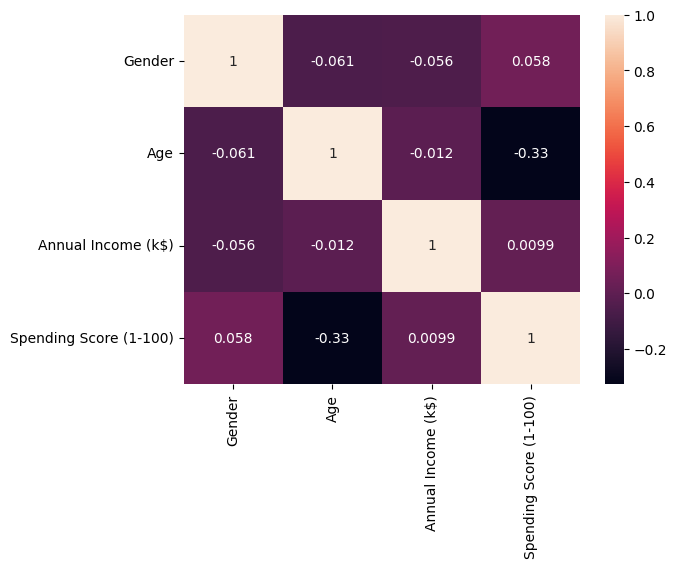

In [50]:
# Feature selection, excluding non-numeric columns
X_hier = usl_df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Select only numeric features

sns.heatmap(X_hier.corr(), annot=True)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_hier)

X_scaled = pd.DataFrame(X_scaled, columns=X_hier.columns)
X_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


Top 10 maximum heights in dendrogram: [20.11762535325914, 13.643192440313793, 13.309181265507936, 11.96152414819709, 10.93308320143295, 8.879781416805448, 8.514070496169163, 7.37102449207348, 7.283461106512753, 5.145538973731516]

Average of top 10 maximum heights: 10.715848289400329


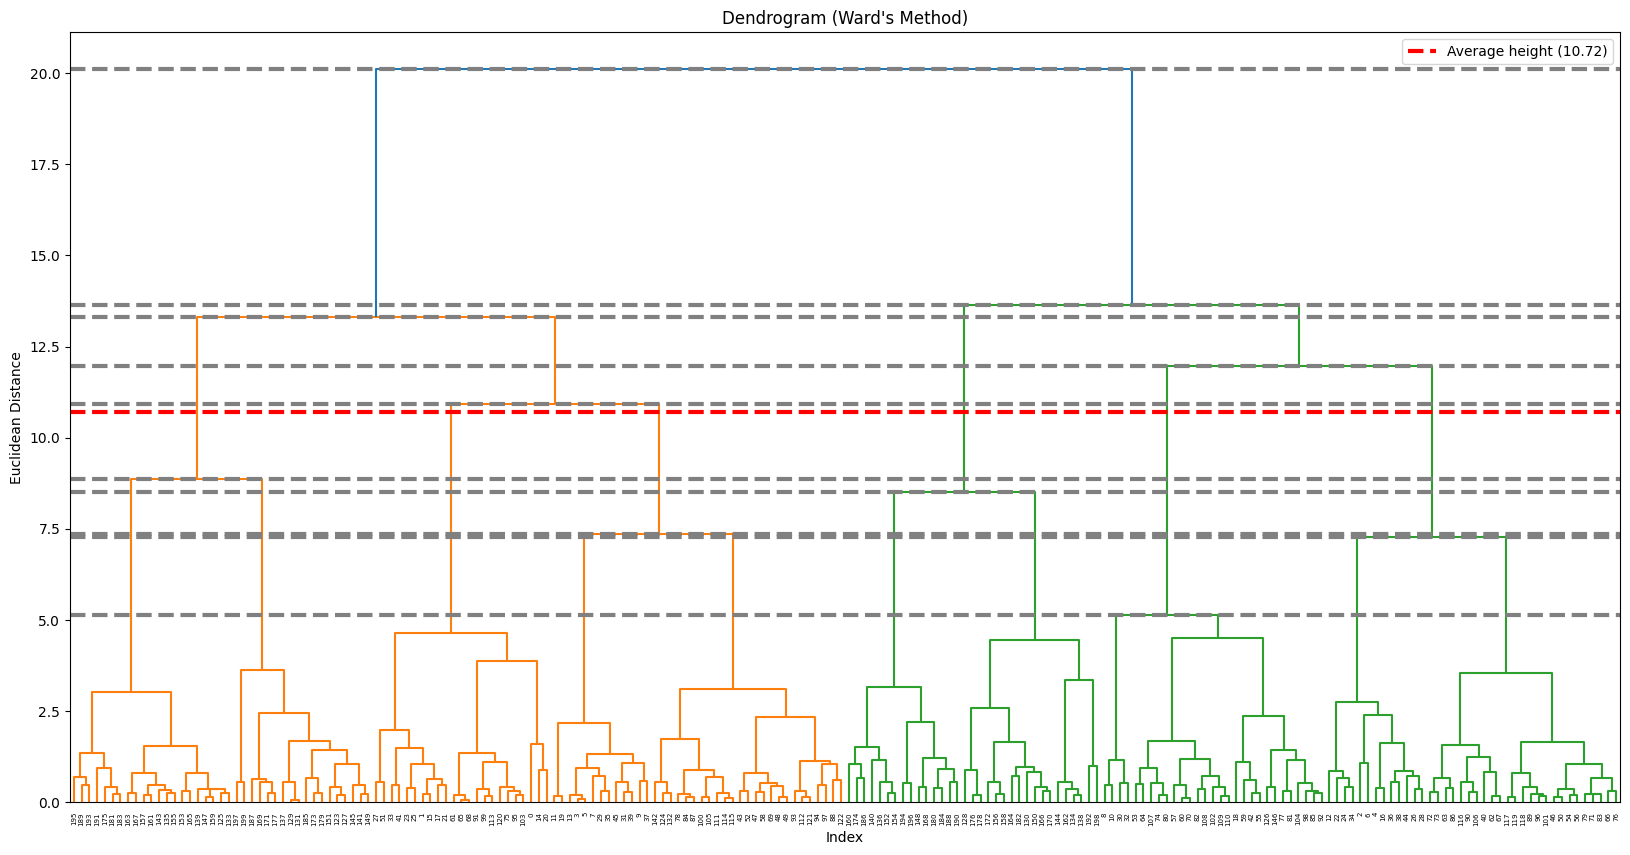

In [52]:
from scipy.cluster import hierarchy

# Generate the linkage matrix using Ward's method
linkage_matrix = hierarchy.linkage(X_scaled, method='ward')

# Extract the heights (distances) from the linkage matrix and find the top 10 unique maximum heights
heights = sorted(set(linkage_matrix[:, 2]), reverse=True)[:10]
print("Top 10 maximum heights in dendrogram:", heights)

# Calculate the average of the top 3 maximum heights
average_height = sum(heights) / len(heights)
print("\nAverage of top 10 maximum heights:", average_height)

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Draw horizontal lines at the top 10 maximum heights
for height in heights:
    plt.axhline(y=height, color='grey', linestyle='dashed', linewidth=3)

# Draw a horizontal line for the average height
plt.axhline(y=average_height, color='red', linestyle='dashed', linewidth=3, label=f'Average height ({average_height:.2f})')

plt.title('Dendrogram (Ward\'s Method)')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()

#**METHOD-1**
#**K - Value manually observing the dendrogram by two nearest heights to the average**

Top 10 maximum heights in dendrogram: [20.11762535325914, 13.643192440313793, 13.309181265507936, 11.96152414819709, 10.93308320143295, 8.879781416805448, 8.514070496169163, 7.37102449207348, 7.283461106512753, 5.145538973731516]

Average of top 10 maximum heights: 10.715848289400329

Two nearest heights to the average: [10.93308320143295, 11.96152414819709]


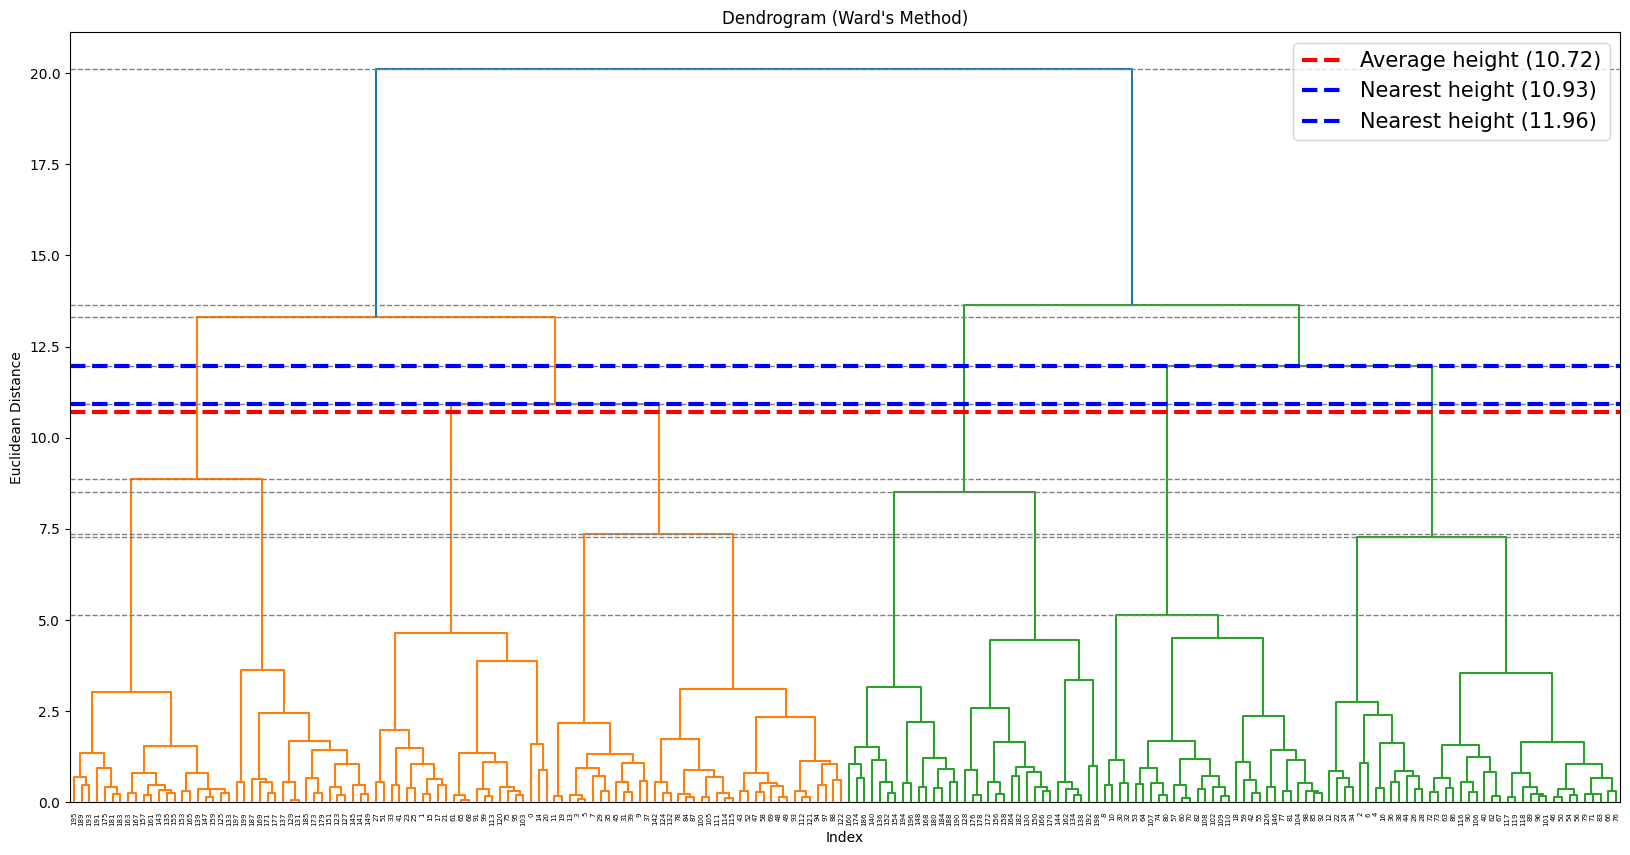

In [53]:
# Generate the linkage matrix using Ward's method
linkage_matrix = hierarchy.linkage(X_scaled, method='ward')

# Extract the heights (distances) from the linkage matrix and find the top 10 unique maximum heights
heights = sorted(set(linkage_matrix[:, 2]), reverse=True)[:10]
print("Top 10 maximum heights in dendrogram:", heights)

# Calculate the average of the top 10 maximum heights
average_height = sum(heights) / len(heights)
print("\nAverage of top 10 maximum heights:", average_height)

# Find the two nearest heights to the average
differences = [abs(height - average_height) for height in heights]
nearest_indices = sorted(range(len(differences)), key=lambda i: differences[i])[:2]

# Get the two nearest heights
nearest_heights = [heights[i] for i in nearest_indices]
print("\nTwo nearest heights to the average:", nearest_heights)

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Draw horizontal lines at the top 10 maximum heights
for height in heights:
    plt.axhline(y=height, color='grey', linestyle='dashed', linewidth=1)

# Draw a horizontal line for the average height
plt.axhline(y=average_height, color='red', linestyle='dashed', linewidth=3, label=f'Average height ({average_height:.2f})')

# Draw horizontal lines for the two nearest heights to the average with a different color
for nearest_height in nearest_heights:
    plt.axhline(y=nearest_height, color='blue', linestyle='dashed', linewidth=3, label=f'Nearest height ({nearest_height:.2f})')

plt.title('Dendrogram (Ward\'s Method)')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.legend(loc='upper right', fontsize=15)
plt.show()

## **Dendrogram Analysis with Ward's Method**

1. **Generate Linkage Matrix**:
   - Used Ward's method to compute cluster distances.
   
2. **Extract Top 10 Heights**:
   - Sorted and retrieved the top 10 unique cluster heights (distances).

3. **Calculate Average Height**:
   - Found the average of the top 10 heights.

4. **Find Two Nearest Heights to Average**:
   - Identified the two heights closest to the average by calculating absolute differences.

5. **Visualize Dendrogram**:
   - Plotted the dendrogram.
   - Marked:
     - Top 10 heights with **grey dashed lines**.
     - Average height with a **red dashed line**.
     - Two nearest heights with **blue dashed lines**.

### **Key Observation:**
- By seeing the **two nearest heights**, we observe **5 vertical lines** in the dendrogram:
  - **2 orange lines**.
  - **3 green lines**.
- This indicates that the **optimal k-value** (number of clusters) is **5**.


#**METHOD-2**
#**K - Value automatically calcuated by machine (count of heights above the average)**

Top 10 maximum heights in dendrogram: [20.11762535325914, 13.643192440313793, 13.309181265507936, 11.96152414819709, 10.93308320143295, 8.879781416805448, 8.514070496169163, 7.37102449207348, 7.283461106512753, 5.145538973731516]

Average of top 10 maximum heights: 10.715848289400329

Heights above the average: [20.11762535325914, 13.643192440313793, 13.309181265507936, 11.96152414819709, 10.93308320143295]

Optimal k-value (number of clusters): 5


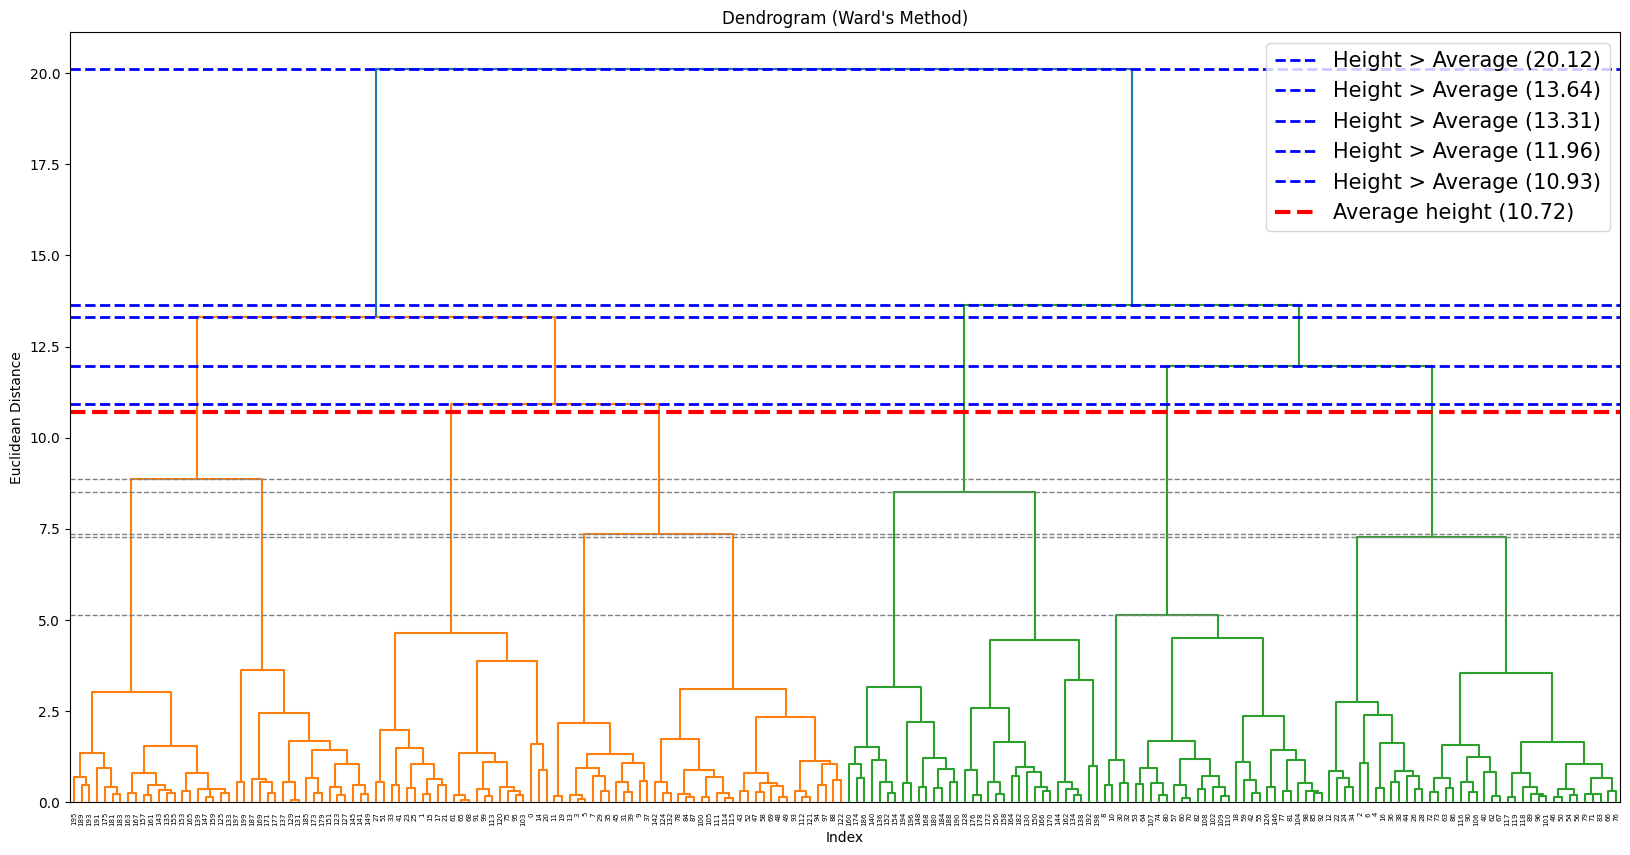

In [62]:
# Generate the linkage matrix using Ward's method
linkage_matrix = hierarchy.linkage(X_scaled, method='ward')

# Extract the heights (distances) from the linkage matrix and find the top 10 unique maximum heights
heights = sorted(set(linkage_matrix[:, 2]), reverse=True)[:10]
print("Top 10 maximum heights in dendrogram:", heights)

# Calculate the average of the top 10 maximum heights
average_height = sum(heights) / len(heights)
print("\nAverage of top 10 maximum heights:", average_height)

# Identify heights above the average and count them
above_average_heights = [height for height in heights if height > average_height]
optimal_k_value = len(above_average_heights)
print(f"\nHeights above the average: {above_average_heights}")
print(f"\nOptimal k-value (number of clusters): {optimal_k_value}")

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Draw horizontal lines for heights
for height in heights:
    if height > average_height:
        plt.axhline(y=height, color='blue', linestyle='dashed', linewidth=2, label=f'Height > Average ({height:.2f})')
    else:
        plt.axhline(y=height, color='grey', linestyle='dashed', linewidth=1)

# Draw a horizontal line for the average height
plt.axhline(y=average_height, color='red', linestyle='dashed', linewidth=3, label=f'Average height ({average_height:.2f})')

plt.title('Dendrogram (Ward\'s Method)')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.legend(loc='upper right', fontsize=15)
plt.show()

## **Optimal k-Value from Dendrogram Analysis**

### **Key Points:**
1. **Average Height**: Calculated from the top 10 maximum heights in the dendrogram.
2. **Optimal Clusters (k)**: The number of heights above the average height represents the optimal k-value.
3. **Dendrogram Insights**:
   - Heights above the average are shown as **blue dashed lines**.
   - The **red dashed line** represents the average height.

### **Observation:**
The number of heights above the average corresponds to the **optimal k-value**. For example:
- If there are **5 heights above the average**, the **optimal k-value** is `k=5`.


In [69]:
from sklearn.cluster import AgglomerativeClustering

# Get labels from Agglomearative Hierarchical clustering
hclustering = AgglomerativeClustering(n_clusters=optimal_k_value)
hclustering.fit_predict(X_scaled)
cluster_label = hclustering.labels_

In [70]:
# Add hcluster labels to df
usl_df['HClusters'] = cluster_label
usl_df.head() # First 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,HClusters
0,1,0,19,15,39,Cluster 1,0
1,2,0,21,15,81,Cluster 4,0
2,3,1,20,16,6,Cluster 1,3
3,4,1,23,16,77,Cluster 4,0
4,5,1,31,17,40,Cluster 1,3


In [71]:
usl_df['HClusters'].unique()

array([0, 3, 4, 1, 2])

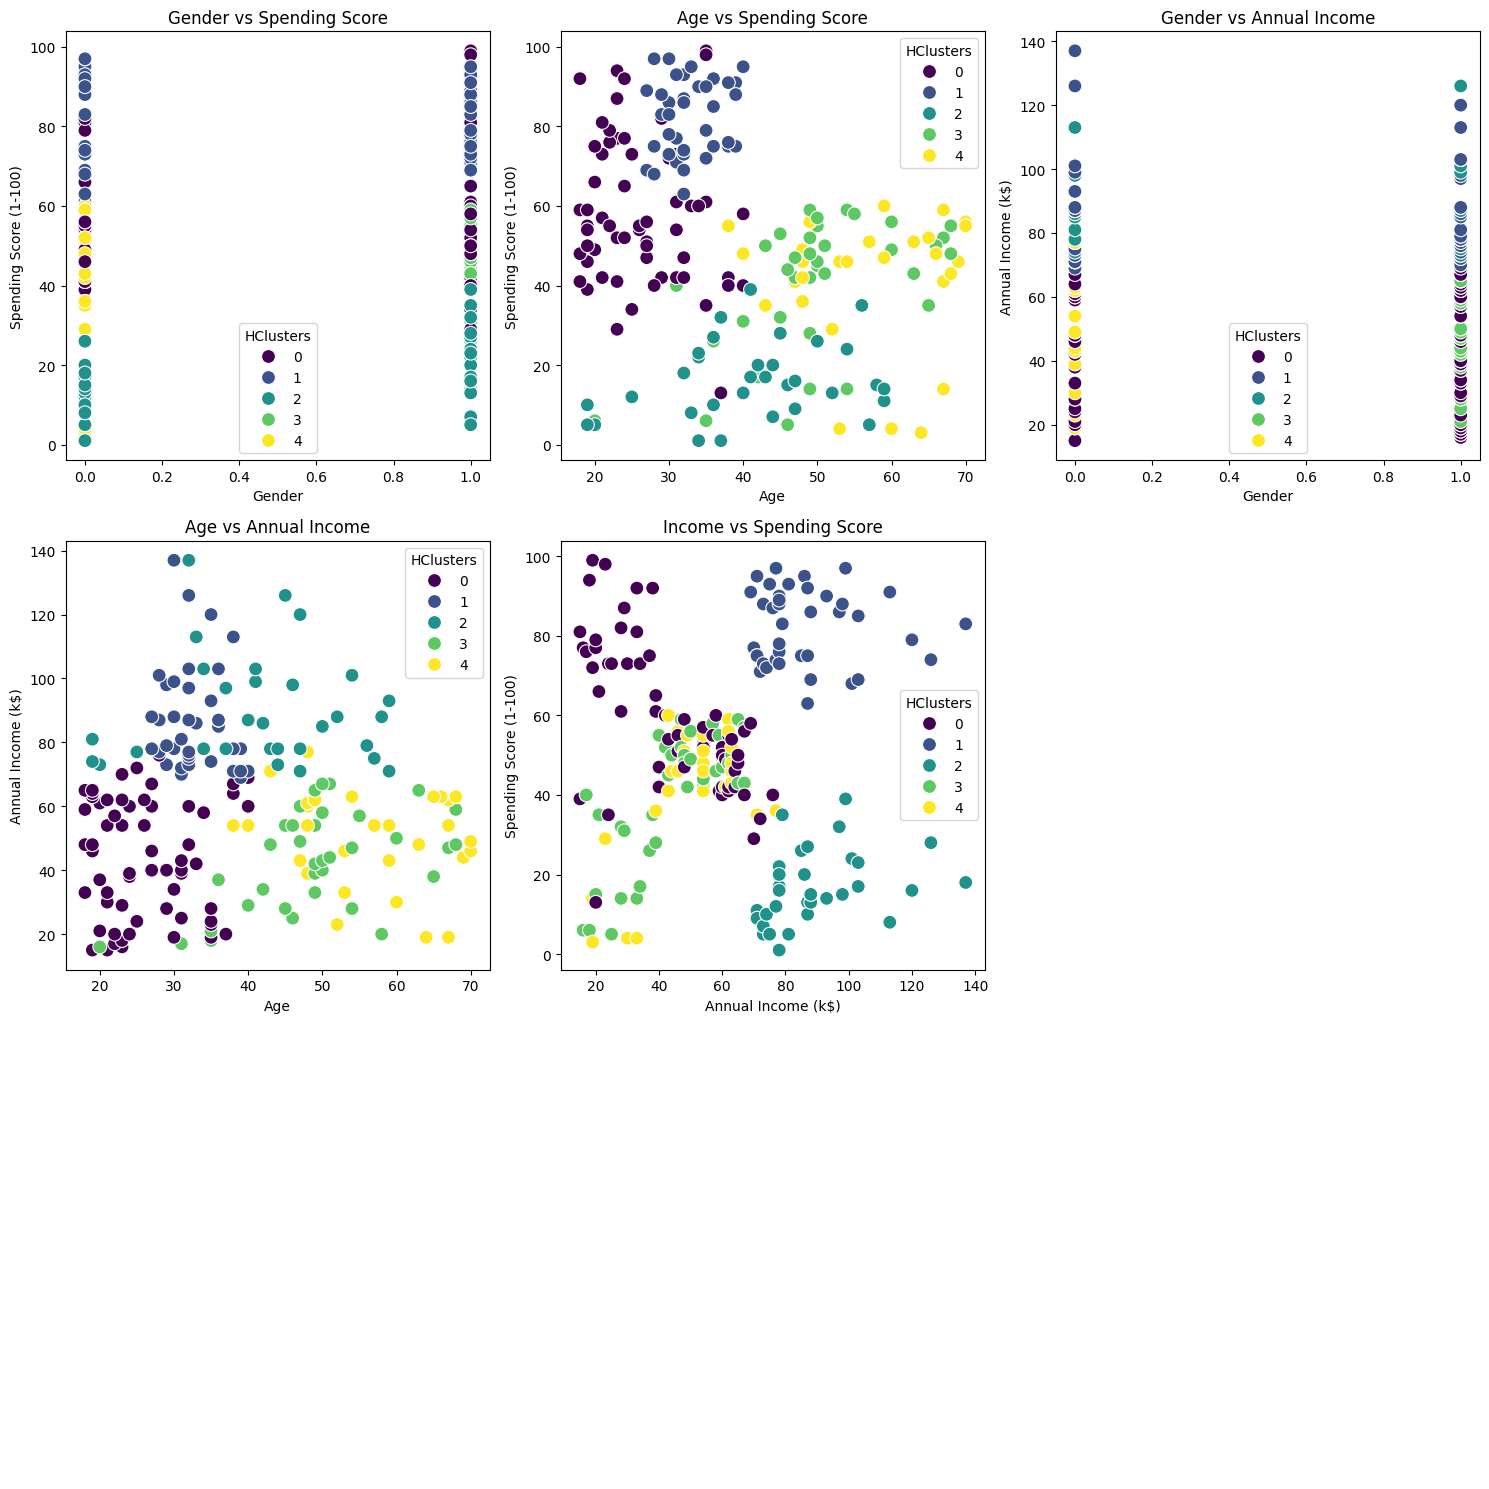

In [99]:
# Create subplots: 3 rows, 3 columns, with the center plot being Income vs Spending
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Scatter plot for Gender vs Spending Score (HClusters as hue)
sns.scatterplot(data=usl_df, x='Gender', y='Spending Score (1-100)', hue='HClusters', palette='viridis', s=100, ax=axs[0, 0])
axs[0, 0].set_title("Gender vs Spending Score")

# Scatter plot for Age vs Spending Score (HClusters as hue)
sns.scatterplot(data=usl_df, x='Age', y='Spending Score (1-100)', hue='HClusters', palette='viridis', s=100, ax=axs[0, 1])
axs[0, 1].set_title("Age vs Spending Score")

# Scatter plot for Gender vs Annual Income (HClusters as hue)
sns.scatterplot(data=usl_df, x='Gender', y='Annual Income (k$)', hue='HClusters', palette='viridis', s=100, ax=axs[0, 2])
axs[0, 2].set_title("Gender vs Annual Income")

# Scatter plot for Age vs Annual Income (HClusters as hue)
sns.scatterplot(data=usl_df, x='Age', y='Annual Income (k$)', hue='HClusters', palette='viridis', s=100, ax=axs[1, 0])
axs[1, 0].set_title("Age vs Annual Income")

# Center scatter plot for Annual Income vs Spending Score (HClusters as hue)
sns.scatterplot(data=usl_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='HClusters', palette='viridis', s=100, ax=axs[1, 1])
axs[1, 1].set_title("Income vs Spending Score")

# Remove unnecessary empty subplots in the bottom row (axs[2, 0], axs[2, 1], axs[2, 2])
for i in range(3):
    for j in range(3):
        if axs[i, j] not in [axs[0, 0], axs[0, 1], axs[0, 2], axs[1, 0], axs[1, 1]]:
            axs[i, j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#**Final Cluster Labeling**

Based on the analysis from the various graphs, we can confidently categorize the clusters as follows:

## **Customer Segmentation Insights**

The following are the insights and suggested names for each cluster based on the customer segmentation analysis:

### **Cluster 0 -** **"Young Explorers"**
- **Characteristics**: Predominantly young individuals with limited income and varying spending habits.
- **Insight**: This group may be experimenting with different products and services but are price-sensitive. They are likely to respond well to discounts and promotions.
- **Strategy**: Offer loyalty programs, student discounts, or event-based promotions to encourage repeat visits.

---

### **Cluster 1 -** **"Affluent Loyalists"**
- **Characteristics**: Middle-aged, middle-income customers with high spending scores, indicating consistent engagement.
- **Insight**: These customers are likely regular shoppers with a stable income and loyalty to the mall’s offerings.
- **Strategy**: Tailor premium services, exclusive membership benefits, and personalized deals to retain their loyalty and boost their shopping experience.

---

### **Cluster 2 -** **"Elite Shoppers"**
- **Characteristics**: High-income individuals with moderate to high spending scores.
- **Insight**: This group includes high-income, potentially brand-conscious shoppers who may appreciate exclusivity.
- **Strategy**: Consider offering VIP treatment, luxury goods, and exclusive events or services to create a premium experience for these customers.

---

### **Cluster 3 -** **"Budget Seekers"**
- **Characteristics**: Younger, low to moderate income individuals with lower spending scores.
- **Insight**: These customers are budget-conscious, likely shopping with caution and sensitivity to price.
- **Strategy**: Attract them with budget-friendly promotions, combo deals, and flash sales to increase their spending and engagement.

---

### **Cluster 4 -** **"Conservative Seniors"**
- **Characteristics**: Older customers with moderate income and low spending scores.
- **Insight**: This group may include senior shoppers who are less frequent visitors and more conservative in their spending.
- **Strategy**: Engage them with age-friendly promotions, comfortable shopping experiences, and targeted services that cater to their preferences.

---

### **Summary of Cluster Names:**
- **Young Explorers**: Young, low-income, varied spenders.

- **Affluent Loyalists**: Middle-aged, middle-income, high spenders.

- **Elite Shoppers**: High-income, high-engagement shoppers.

- **Budget Seekers**: Younger, budget-conscious shoppers.

- **Conservative Seniors**: Older, conservative shoppers.

These insights and strategies can help in effectively segmenting and targeting each group according to their shopping behaviors and preferences.


In [101]:
usl_df['HClusters'] = usl_df['HClusters'].replace({
    0: 'Young Explorers',
    1: 'Affluent Loyalists',
    2: 'Elite Shoppers',
    3: 'Budget Seekers',
    4: 'Conservative Seniors'
})

In [102]:
usl_df['HClusters'].value_counts()

,count
HClusters,
Young Explorers,61
Affluent Loyalists,39
Budget Seekers,38
Elite Shoppers,33
Conservative Seniors,29


In [104]:
young_explorers = usl_df[usl_df['HClusters'] == 'Young Explorers']
young_explorers['Age']

,Age
0,19
1,21
3,23
5,22
7,23
...,...
121,38
122,40
124,23
132,25


In [106]:
affluent_loyalists = usl_df[usl_df['HClusters'] == 'Affluent Loyalists']
affluent_loyalists['Spending Score (1-100)']

,Spending Score (1-100)
123,91
125,77
127,95
129,75
131,75
133,71
135,88
137,73
139,72
141,93


In [107]:
usl_df.head() # First 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,HClusters
0,1,0,19,15,39,Cluster 1,Young Explorers
1,2,0,21,15,81,Cluster 4,Young Explorers
2,3,1,20,16,6,Cluster 1,Budget Seekers
3,4,1,23,16,77,Cluster 4,Young Explorers
4,5,1,31,17,40,Cluster 1,Budget Seekers


In [120]:
elite_shoppers = usl_df[usl_df['HClusters'] == 'Elite Shoppers']
elite_shoppers['Gender']

,Gender
128,0
130,0
134,0
136,1
138,0
140,1
144,0
148,1
150,0
152,1


In [125]:
# Example to filter and display information for a specific group, e.g., "Young Explorers"
young_explorers = usl_df[usl_df['HClusters'] == 'Young Explorers']
young_explorers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,HClusters
0,1,0,19,15,39,Cluster 1,Young Explorers
1,2,0,21,15,81,Cluster 4,Young Explorers
3,4,1,23,16,77,Cluster 4,Young Explorers
5,6,1,22,17,76,Cluster 4,Young Explorers
7,8,1,23,18,94,Cluster 4,Young Explorers
...,...,...,...,...,...,...,...
121,122,1,38,67,40,Cluster 2,Young Explorers
122,123,1,40,69,58,Cluster 2,Young Explorers
124,125,1,23,70,29,Cluster 5,Young Explorers
132,133,1,25,72,34,Cluster 2,Young Explorers


In [128]:
affluent_loyalists = usl_df[usl_df['HClusters'] == 'Affluent Loyalists']
affluent_loyalists['Annual Income (k$)']

,Annual Income (k$)
123,69
125,70
127,71
129,71
131,71
133,72
135,73
137,73
139,74
141,75


#**THANK YOU**